In [110]:
import numpy as np
import pandas as pd 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [111]:
X_y_train = pd.read_csv('/kaggle/input/bgudrugchallenge2022/X_y_train.csv')
X_test = pd.read_csv('/kaggle/input/bgudrugchallenge2022/X_test.csv')

# 1. Preprocess

In [112]:
y_train = X_y_train['y']
X_train = X_y_train.iloc[:, X_y_train.columns != 'y']

In [113]:
# spliting the train data to train set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25)
# check the splited data
print(len(X_train))
print(len(X_val))
print(y_train.value_counts())
print(y_val.value_counts())

11250
3750
1    4927
2    3164
0    3159
Name: y, dtype: int64
1    1605
0    1098
2    1047
Name: y, dtype: int64


# 2. Feature Selection

In [114]:
num_features = 500
X_norm = MinMaxScaler().fit_transform(X_train)

### 2.1 Pearson Correlation

In [115]:
def cor_selector(X, y,num_features):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [116]:
cor_support, cor_feature = cor_selector(X_train, y_train,num_features)

invalid value encountered in true_divide
invalid value encountered in true_divide


### 2.2 Chi-Squared

In [117]:
chi_selector = SelectKBest(chi2, k=num_features)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()

### 2.3 Recursive Feature Elimination

In [118]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features, step=20, verbose=5)
rfe_selector.fit(X_norm, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()

Fitting estimator with 1232 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1212 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1192 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1172 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1152 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1132 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1112 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1092 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1072 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1052 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1032 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 1012 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 992 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 972 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 952 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 932 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 912 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 892 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 872 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 852 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 832 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 812 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 792 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 772 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 752 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 732 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 712 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 692 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 672 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 652 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 632 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 612 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 592 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 572 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 552 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 532 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 512 features.


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 2.4 Lasso: SelectFromModel

In [119]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_features)
embeded_lr_selector.fit(X_norm, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 2.5 Tree-based: SelectFromModel

#### 2.5.1 Random Forest

In [120]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_features)
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()

#### 2.5.2 LGBM

In [121]:
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_features)
embeded_lgb_selector.fit(X_train, y_train)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()

#### 2.5.3 AdaBoost

In [122]:
adaboost = AdaBoostClassifier(n_estimators=500, learning_rate=0.05)
embeded_adaboost_selector = SelectFromModel(adaboost, max_features=num_features)
embeded_adaboost_selector.fit(X_train, y_train)

embeded_adaboost_support = embeded_adaboost_selector.get_support()
embeded_adaboost_feature = X_train.loc[:,embeded_adaboost_support].columns.tolist()

### 2.6 All Together

In [123]:
feature_name = X_train.columns

In [124]:
feature_selection_rf_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support, 'AdaBoost':embeded_adaboost_support})
# count the selected times for each feature
feature_selection_rf_df['Total'] = np.sum(feature_selection_rf_df, axis=1)
# display the top 500
feature_selection_rf_df = feature_selection_rf_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_rf_df.index = range(1, len(feature_selection_rf_df)+1)
top_feature_selection_rf_df = feature_selection_rf_df.head(500)['Feature']
top_feature_selection_rf_df

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


1      X1178
2      X1177
3      X1139
4      X1134
5      X1130
       ...  
496      X67
497     X668
498     X663
499     X656
500     X654
Name: Feature, Length: 500, dtype: object

# 3. Transform Data with Top Feature

In [125]:
X_train_top_feature_rf = X_train.loc[:,top_feature_selection_rf_df.to_list()]
X_val_top_feature_rf = X_val.loc[:,top_feature_selection_rf_df.to_list()]
X_test_top_feature_rf = X_test.loc[:,top_feature_selection_rf_df.to_list()]

# 4. Modeling

In [126]:
lvl1= {
        "rf1": RandomForestClassifier(n_estimators=450),
        "rf2": RandomForestClassifier(n_estimators=500),
        "rf3": RandomForestClassifier(n_estimators=550),
        "ada1": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),algorithm="SAMME.R",n_estimators=500, learning_rate=0.5),
        "ada2": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),algorithm="SAMME.R",n_estimators=500, learning_rate=0.9),
        "ada3": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),algorithm="SAMME.R",n_estimators=500, learning_rate=1.2),
        "gbc1": GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5,max_depth=1),
        "gbc2": GradientBoostingClassifier(n_estimators=1000, learning_rate=0.9,max_depth=1),
        "gbc3": GradientBoostingClassifier(n_estimators=1000, learning_rate=1.2,max_depth=1),
        "LGBM1": LGBMClassifier(n_estimators=1000, learning_rate=0.5),
        "LGBM2": LGBMClassifier(n_estimators=1000, learning_rate=0.9),
        "LGBM3": LGBMClassifier(n_estimators=1000, learning_rate=1.2),
        "MLP1" : MLPClassifier(hidden_layer_sizes=(200,), max_iter=1500),
        "MLP2" : MLPClassifier(hidden_layer_sizes=(300,), max_iter=1500),
        "MLP3" : MLPClassifier(hidden_layer_sizes=(400,), max_iter=1500),
}

In [127]:
est = [(key,val) for key,val in lvl1.items()]

eclf = VotingClassifier(
    estimators=est,
    voting='soft')

### 4.1 Fit Model

In [128]:
eclf.fit(X_train_top_feature_rf,y_train)

VotingClassifier(estimators=[('rf1', RandomForestClassifier(n_estimators=450)),
                             ('rf2', RandomForestClassifier(n_estimators=500)),
                             ('rf3', RandomForestClassifier(n_estimators=550)),
                             ('ada1',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                                 learning_rate=0.5,
                                                 n_estimators=500)),
                             ('ada2',
                              AdaBoostClassifier(base_estimator=DecisionTreeClass...
                                             n_estimators=1000)),
                             ('LGBM2',
                              LGBMClassifier(learning_rate=0.9,
                                             n_estimators=1000)),
                             ('LGBM3',
                              LGBMClassifier(learning_rate=1.2,
                       

### 4.2 Predict

In [129]:
pred_lvl3 = eclf.predict(X_test_top_feature_rf)

### 4.3 Save as CSV

In [130]:
Y_example = pd.read_csv('/kaggle/input/bgudrugchallenge2022/y_test_submission_example.csv')
Y_example['y_pred'] = pred_lvl3
print(Y_example)
Y_example.to_csv('/kaggle/working/my_try_MLP_res.csv', index=False)

          ID  y_pred
0      20000       2
1      20001       0
2      20002       2
3      20003       2
4      20004       1
...      ...     ...
14995  34995       1
14996  34996       2
14997  34997       0
14998  34998       2
14999  34999       2

[15000 rows x 2 columns]


# 5. Analyze

### 5.1 AUC

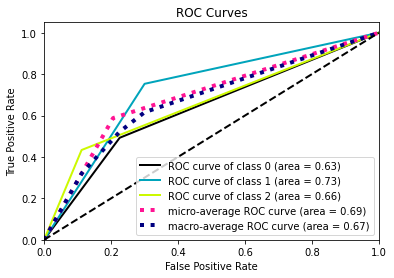

In [131]:
import scikitplot as skplt
import matplotlib.pyplot as plt

pred_val = eclf.predict(X_val_top_feature_rf)
mat = []
for pred in pred_val:
    if pred == 0:
        proba = [1, 0, 0]
    elif pred == 1:
        proba = [0, 1, 0]
    else:
        proba = [0, 0, 1]
    mat.append(proba)
    
mat = np.array(mat)
skplt.metrics.plot_roc(y_val, mat)
plt.show()

### 5.2 Shap

In [132]:
# # !pip install shap
import shap
eclf_for_shap = LGBMClassifier(n_estimators=1000, learning_rate=0.5)
eclf_for_shap.fit(X_train_top_feature_rf,y_train)
# Create object that can calculate shap values
explainer = shap.TreeExplainer(eclf_for_shap)

#### 5.2.1 Shap Force plots

In [133]:
shap.initjs()
data_for_pred = X_val_top_feature_rf.iloc[[2]]
shap_values = explainer.shap_values(data_for_pred)
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_pred)

In [134]:
shap.initjs()
##### FORCE PLOT #####
data_for_pred = X_val_top_feature_rf.iloc[[4]]
shap_values = explainer.shap_values(data_for_pred)
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_pred)

In [135]:
shap.initjs()
##### FORCE PLOT #####
data_for_pred = X_val_top_feature_rf.iloc[[8]]
shap_values = explainer.shap_values(data_for_pred)
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_pred)

#### 5.2.2 Shap Summary plot top 5

In [136]:
# Calculate Shap values
shap_values = explainer.shap_values(X_val_top_feature_rf)

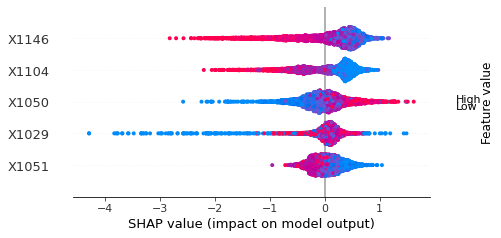

In [137]:
shap.initjs()
shap.summary_plot(shap_values[0], X_val_top_feature_rf, max_display=5)

#### 5.2.3 Shap Dependence plot

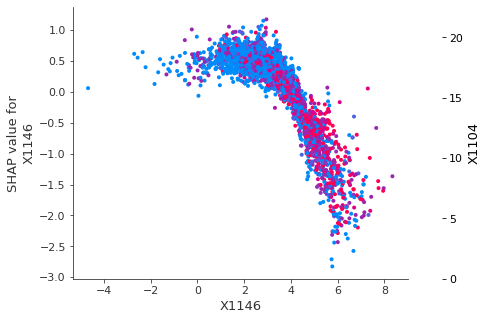

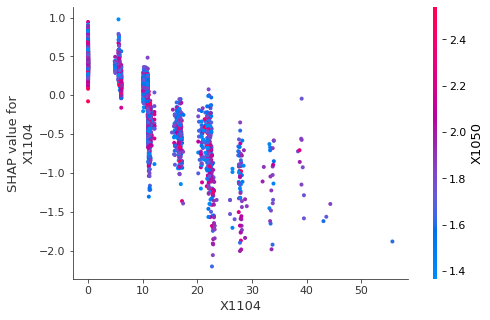

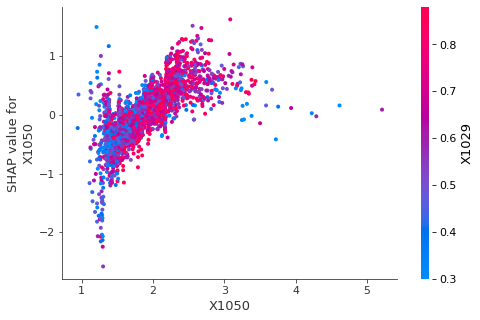

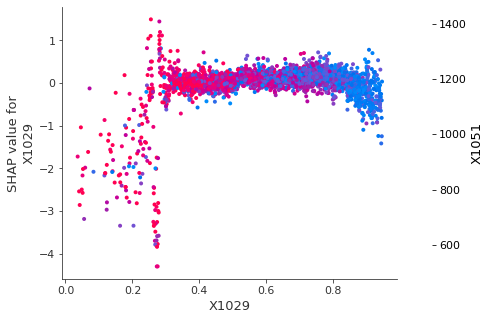

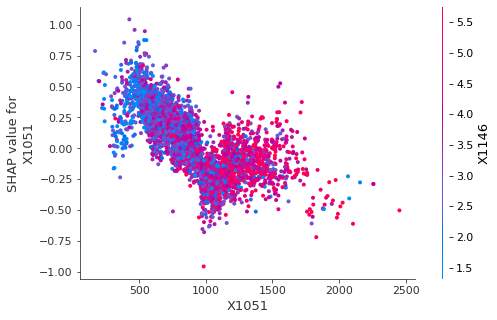

In [139]:
shap.initjs()
shap.dependence_plot("X1146", shap_values[0], X_val_top_feature_rf, interaction_index="X1104")
shap.dependence_plot("X1104", shap_values[0], X_val_top_feature_rf, interaction_index="X1050")
shap.dependence_plot("X1050", shap_values[0], X_val_top_feature_rf, interaction_index="X1029")
shap.dependence_plot("X1029", shap_values[0], X_val_top_feature_rf, interaction_index="X1051")
shap.dependence_plot("X1051", shap_values[0], X_val_top_feature_rf, interaction_index="X1146")